# Increase the number of samples  

In [1]:
import hashlib
from PIL import Image
import io, os
import requests
import time
import selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
PATH=ChromeDriverManager().install()

wd = webdriver.Chrome(PATH)


[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 104.0.5112
[WDM] - Get LATEST chromedriver version for 104.0.5112 google-chrome
[WDM] - Driver [C:\Users\botic\.wdm\drivers\chromedriver\win32\104.0.5112.79\chromedriver.exe] found in cache
C:\Users\botic\AppData\Local\Temp\ipykernel_32348\1192022939.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome(PATH)


In [7]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=2):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"
    
    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        print(image_count,max_links_to_fetch)
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        
        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [8]:
def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

In [9]:
def search_and_download(search_term:str,driver_path:str,target_path='./images',number_images=5):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path=driver_path) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.1)
        
    for elem in res:
        persist_image(target_folder,elem)

### Increase baseball samples 

In [11]:
search_term = 'baseball'
search_and_download(search_term,PATH,'./img/train/',number_images=300)

C:\Users\botic\AppData\Local\Temp\ipykernel_32348\4076800424.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  with webdriver.Chrome(executable_path=driver_path) as wd:


0 300
Found: 0 search results. Extracting links from 0:0
0 300


C:\Users\botic\AppData\Local\Temp\ipykernel_32348\1774944906.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")


Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extrac

C:\Users\botic\AppData\Local\Temp\ipykernel_32348\1774944906.py:34: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  actual_images = wd.find_elements_by_css_selector('img.n3VNCb')


55 300
Found: 100 search results. Extracting links from 48:100
129 300
Found: 200 search results. Extracting links from 100:200
129 300
Found: 100 search results. Extracting links from 200:100
129 300
Found: 100 search results. Extracting links from 100:100
129 300
Found: 100 search results. Extracting links from 100:100
129 300
Found: 100 search results. Extracting links from 100:100
129 300
Found: 100 search results. Extracting links from 100:100
129 300
Found: 100 search results. Extracting links from 100:100
129 300
Found: 100 search results. Extracting links from 100:100
129 300
Found: 100 search results. Extracting links from 100:100
129 300
Found: 100 search results. Extracting links from 100:100
129 300
Found: 100 search results. Extracting links from 100:100
129 300
Found: 100 search results. Extracting links from 100:100
129 300
Found: 100 search results. Extracting links from 100:100
129 300
Found: 200 search results. Extracting links from 100:200
275 300
Found: 312 search r

SUCCESS - saved https://static.wbsc.org/assets/cms/af480413-5fbc-c86f-7211-4831fd8c05d7.jpg - as ./img/train/baseball\f6c4cb6715.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8ZPjGj49rcQsZ3X-xHoyy4yupzTF2qfgHBQ&usqp=CAU - as ./img/train/baseball\1fe012a317.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYLy4L_QM1uqTSt7BavUh2ugI-OySlt1h3yA&usqp=CAU - as ./img/train/baseball\f495099c55.jpg
SUCCESS - saved https://static.wbsc.org/wp-content/uploads/WBSC-Baseball-5-B5-Official-Emlem-DL-768x461.png - as ./img/train/baseball\1bd64498e5.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSIwZEtto9plokQBxODM1yxCmxxoDl5kTjBeg&usqp=CAU - as ./img/train/baseball\1fa2c6d5c7.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYqWxpyQ-2Tn9JBqjYIOocL78SxElxhsbUwA&usqp=CAU - as ./img/train/baseball\f2bf927b23.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSLDxV7fsZZ--f-H9Pfx3

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrVQ-Vhl8UCQqyldqRNfFNQs92i6U8Atr0XQ&usqp=CAU - as ./img/train/baseball\d93e5ea3e2.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9JapowNK6hYiz69O41fWpbJ7mMvEQkOOx3A&usqp=CAU - as ./img/train/baseball\616aef3c9e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQK9XpqJcIp8r9NasHINVGSuvuMuvc_e_eH2w&usqp=CAU - as ./img/train/baseball\e325ba0ab2.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSbxcu5NpCB0xR7C7le83AT3A2ikfDonVwvsw&usqp=CAU - as ./img/train/baseball\7be10da7bd.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfxDrBUENYxN0JuHLwczeTckRDbW3WsJkfWw&usqp=CAU - as ./img/train/baseball\947c8a2ed2.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR5-ggZBG-APV8licQjM3l8kz8rmRLzvgth-w&usqp=CAU - as ./img/train/baseball\d9b36641b4.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?

SUCCESS - saved https://yt3.ggpht.com/ytc/AMLnZu9HTbtrV4L872Qh50XSn2XYr1a_WCLccXP347lTdA=s900-c-k-c0x00ffffff-no-rj - as ./img/train/baseball\2ee27090a8.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTXcUEHpJ3_XYOwiVwXN5mQgvhbL3EY-5-_BA&usqp=CAU - as ./img/train/baseball\4f93b4109a.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNBUU9UB_wAbBlBb41yGmcwie7ocO3sAG1wA&usqp=CAU - as ./img/train/baseball\e694ef699e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpO0b2iCWQlfw4Re-d4HVM-oI30Hm6dGb4rg&usqp=CAU - as ./img/train/baseball\1768be0536.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTrPTnnQuT_DQ6exCZa9fCaMSJMHzpC4SN4zQ&usqp=CAU - as ./img/train/baseball\f183795cb1.jpg
SUCCESS - saved https://ae01.alicdn.com/kf/H69755df509c042a5a108588a9af070ccC/D-12-Logo-Baseball-cap-Vintage-Hip-Hop-Rap-Eminem-D12-Slim-Shady-D-12-Revival.jpg - as ./img/train/baseball\f4233dfc35.jpg
SUCCESS - save

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMGh72ZuIB8ObzGqF5HmNDiq3RKIwxkALEPQ&usqp=CAU - as ./img/train/baseball\b2a86d8ced.jpg
SUCCESS - saved https://image.shutterstock.com/image-photo/image-260nw-558896782.jpg - as ./img/train/baseball\159a81c467.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYQEmhKxNo9yRhTsH06NSx0AlbnH5l4T806g&usqp=CAU - as ./img/train/baseball\9df30fedd5.jpg
SUCCESS - saved https://www.mlbstatic.com/team-logos/share/leagues/milb.jpg?1660569470498 - as ./img/train/baseball\f24db19ffb.jpg
SUCCESS - saved https://cdn.britannica.com/40/146140-131-9EABA7E1/Close-up-Baseball-background-blog-entertainment-arts-society-2010.jpg - as ./img/train/baseball\f6e8866ad0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYm7mJXq9YPKOfLCEpe7G1-djGtyH2nXm97A&usqp=CAU - as ./img/train/baseball\5998d28d9a.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjm0gFgqRXYXUO0ZkYKLH3GYb

SUCCESS - saved https://play-lh.googleusercontent.com/MaK8-ETJ-K-HFW1pBmNm00ykNTD0f3WwK2BkLYc0vcmdsNv_Ddov5Ap6ICO-ir8TRdY=w526-h296-rw - as ./img/train/baseball\0cfa36bfa6.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS7PN3p4iATrj-Zj2dl9Bcr1OZkCU1CKvGZGg&usqp=CAU - as ./img/train/baseball\4ad2d4b514.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLooFEKmD03FkZ-7hE2QQVHkww7VnUbbt9NQ&usqp=CAU - as ./img/train/baseball\cacb098e2c.jpg
SUCCESS - saved https://image.shutterstock.com/image-photo/image-260nw-1887543346.jpg - as ./img/train/baseball\6008161231.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQI6iZ4ZLexh2t_Vq2V2DOKLqjQeL4XZXHRjg&usqp=CAU - as ./img/train/baseball\956ee3882b.jpg
SUCCESS - saved https://content.sportslogos.net/news/2021/03/new-minor-league-baseball-logo-2021-sportslogosnet.png - as ./img/train/baseball\cf9e9971c6.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9G

C:\Users\botic\anaconda3\envs\ironhack\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


SUCCESS - saved https://assets.stickpng.com/thumbs/584d42180a44bd1070d5d418.png - as ./img/train/baseball\cb868b802d.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvuzsfrzdXRfuuHbFw6X6vnghd3ukJpa2Mnw&usqp=CAU - as ./img/train/baseball\1f0b297319.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTR3DQBkfyMUSWIKiBKptybNlbuhJNNFUE5uw&usqp=CAU - as ./img/train/baseball\9fc19a5b4f.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZ-jufV7xbxc4u9tBksHAiIR52pr9qj4f-PQ&usqp=CAU - as ./img/train/baseball\58c95209b4.jpg
SUCCESS - saved https://imagenes.elpais.com/resizer/SBheWFWwbOD3TgL0_AXOky0_6UY=/414x311/cloudfront-eu-central-1.images.arcpublishing.com/prisa/C72RC7NBFFCIJBXLIQMUKYIYMY.jpg - as ./img/train/baseball\f6c30cacd8.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTmgadl1QNobaNiROwmyT043mI2daq4GaeHA&usqp=CAU - as ./img/train/baseball\a64f9cb84b.jpg
SUCCESS - saved https://beisbolgpo.

## Increase cricket samples

In [12]:
search_term = 'cricket'
search_and_download(search_term,PATH,'./img/train/',number_images=300)

C:\Users\botic\AppData\Local\Temp\ipykernel_32348\4076800424.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  with webdriver.Chrome(executable_path=driver_path) as wd:


0 300
Found: 0 search results. Extracting links from 0:0
0 300


C:\Users\botic\AppData\Local\Temp\ipykernel_32348\1774944906.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")


Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 48 search results. Extracting links from 0:48


C:\Users\botic\AppData\Local\Temp\ipykernel_32348\1774944906.py:34: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  actual_images = wd.find_elements_by_css_selector('img.n3VNCb')


44 300
Found: 100 search results. Extracting links from 48:100
120 300
Found: 212 search results. Extracting links from 100:212
254 300
Found: 300 search results. Extracting links from 212:300
Found: 300 image links, done!
SUCCESS - saved https://media.newyorker.com/photos/5f2b2b45d4b98d588c5cdf22/master/pass/Caesar-Cricket.jpg - as ./img/train/cricket\4af5bf830a.jpg
SUCCESS - saved https://imageresizer.static9.net.au/TzYOAtxfyxLLe6cUz28iZER7lI0=/1024x0/https%3A%2F%2Fprod.static9.net.au%2Ffs%2F005c4a3c-4d57-4a76-b2d5-087778c42ecd - as ./img/train/cricket\a8164a168c.jpg
SUCCESS - saved https://static01.nyt.com/images/2013/05/06/nyregion/CRICKET/CRICKET-articleLarge.jpg?quality=75&auto=webp&disable=upscale - as ./img/train/cricket\9166e19efb.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxcf1EW2fP8IrI5pYU3GoqlX43xRrGFuikPQ&usqp=CAU - as ./img/train/cricket\d2114d8fc7.jpg
SUCCESS - saved https://metro.co.uk/wp-content/uploads/2022/08/GettyImages-1413663231.jpg?

SUCCESS - saved https://i.guim.co.uk/img/media/bb79a9dfea22d14dceb0771a9f37fee68a877c47/0_66_4358_2615/master/4358.jpg?width=1200&quality=85&auto=format&fit=max&s=253598e18753cd906b34dccd1f5b63fa - as ./img/train/cricket\9324b5f134.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_RpUIVHbgqiyErnc2oUy15Z2I56sitO579g&usqp=CAU - as ./img/train/cricket\c6f9ab2f46.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6Qu4BN7cWCvVKwOA00FHFKodCDNLUKKsiog&usqp=CAU - as ./img/train/cricket\c42191c9bb.jpg
SUCCESS - saved https://c.ndtvimg.com/2022-07/9v5k47mo_virat-kohli-afp_625x300_15_July_22.jpg?im=FeatureCrop,algorithm=dnn,width=806,height=605 - as ./img/train/cricket\e1ad44a8dd.jpg
SUCCESS - saved https://i.ytimg.com/vi/ebdF4aX9suE/maxresdefault.jpg - as ./img/train/cricket\4535ad2a5b.jpg
SUCCESS - saved https://cdn.britannica.com/09/182109-050-2C066432/Quinton-De-Kock-New-Zealand-Ross-Taylor-March-24-2015.jpg - as ./img/train/cricket\54368ccd4e

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4eX6M_HQ31sm08GsimigxXFGnKyeWHo1Hzw&usqp=CAU - as ./img/train/cricket\29a9fc7d40.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRx62flqpwIXW4p1KNhRgy6BFSSgAuP1EghBQ&usqp=CAU - as ./img/train/cricket\8ec799d714.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGQDAkJoVSrCfZiOaZIghIX-Z3p5e_6-M5Zg&usqp=CAU - as ./img/train/cricket\3e33188e6f.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTvQYXAqgLInXX-dYSkss8S5o18vTdUXDUt1g&usqp=CAU - as ./img/train/cricket\379b36c242.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqE16W2UqIcVJGTcKvjVxX6eMi0UbzSQngPQ&usqp=CAU - as ./img/train/cricket\9fa06dce33.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTE93EIpAf3rc_EVos8T14td8yZr532lkARRQ&usqp=CAU - as ./img/train/cricket\5ac93ad850.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgc5GNbYloWZTXQntu759eKVK9g1Usd1ywQA&usqp=CAU - as ./img/train/cricket\922a34259f.jpg
ERROR - Could not download https://dictionary.cambridge.org/es/images/thumb/cricke_noun_002_09177.jpg?version=5.0.250 - ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
ERROR - Could not save https://dictionary.cambridge.org/es/images/thumb/cricke_noun_002_09177.jpg?version=5.0.250 - local variable 'image_content' referenced before assignment
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1maM4JgPnClzTpI9iEoDlVG--h0NE63YY5w&usqp=CAU - as ./img/train/cricket\5075082ebf.jpg
SUCCESS - saved https://i.ytimg.com/vi/5Ekyg39HUzo/maxresdefault.jpg - as ./img/train/cricket\5c310d95a3.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSylIk7n6-uA_k_YZKPq2Z1Z5GIebWe9cOCcA&usqp=CAU - as ./img/train/cricket\94f54c972a.jpg
SUCCESS - saved https://encrypted-

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzzBC96HotKoBMDTAS5tqDnOTeZKBOKANGGQ&usqp=CAU - as ./img/train/cricket\2254114b55.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtdArJlZ1CtoDwwyeHBODPutZl7F7kqeYIfA&usqp=CAU - as ./img/train/cricket\55029f530c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTaposSiKpavbsKqwUjmg0XZbSb7S9ZYVDlQw&usqp=CAU - as ./img/train/cricket\163729b95e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRIKj2hXbyrovKZW7FXXUB3qisdOXov8AMRIQ&usqp=CAU - as ./img/train/cricket\7f46305ca6.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ1J60Niqki88b-tegfgRH-fypiDGcezHvQRw&usqp=CAU - as ./img/train/cricket\17cc36c755.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSe_Lyuf631DKTVAldK_O09tDwrYIDrfUnGtQ&usqp=CAU - as ./img/train/cricket\fb7d856c12.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:

ERROR - Could not save http://www.elcorreo.com/multimedia/201701/11/media/t5-cricket/M1-57657833.JPG - cannot identify image file <_io.BytesIO object at 0x000001E7C09C8310>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFWrXgIGn3DSosqzMInI_yZX9X0EWmlvuhxA&usqp=CAU - as ./img/train/cricket\4cad74fbf0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBD-QrwlotJfqkJLMUTnbiPNROw-5qS52qMA&usqp=CAU - as ./img/train/cricket\117261d04b.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEWAjv2DAn8JMHM3G95Qn84AhfT_K5nL2y0w&usqp=CAU - as ./img/train/cricket\deada21d3b.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTG8zWj5jQAwryWHMREyisO8uh1M1Q3gkVDbg&usqp=CAU - as ./img/train/cricket\11860eaae2.jpg
SUCCESS - saved https://cdn.vox-cdn.com/thumbor/w9mQsxQm6evyIz2I6GWQe4zF6Hc=/1400x1050/filters:format(jpeg)/cdn.vox-cdn.com/uploads/chorus_asset/file/23288286/51224414.jpg - as ./img/train/cricket\991a80

## Increase soccer samples

In [13]:
search_term = 'soccer'
search_and_download(search_term,PATH,'./img/train/',number_images=300)

C:\Users\botic\AppData\Local\Temp\ipykernel_32348\4076800424.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  with webdriver.Chrome(executable_path=driver_path) as wd:


0 300
Found: 0 search results. Extracting links from 0:0
0 300


C:\Users\botic\AppData\Local\Temp\ipykernel_32348\1774944906.py:20: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")


Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 0 search results. Extracting links from 0:0
0 300
Found: 100 search results. Extracting links from 0:100


C:\Users\botic\AppData\Local\Temp\ipykernel_32348\1774944906.py:34: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  actual_images = wd.find_elements_by_css_selector('img.n3VNCb')


11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 100 search results. Extracting links from 100:100
11 300
Found: 112 search results. Extracting links from 100:112
13 300
Found: 200 search results. Extracting links from 112:200
54 300
Found: 200 search results. Extrac

SUCCESS - saved https://img.bundesliga.com/tachyon/sites/2/2018/12/SoccerPositions-1.jpg?crop=0px,0px,968px,545px - as ./img/train/soccer\b12163cbd2.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRrA0IldtKuZHLL2E9L8ZMv6qWY3C4dVvhHLw&usqp=CAU - as ./img/train/soccer\aa1213fe4f.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4Z5UqqTOfSPbNY34sT7F5iYYSl3vfn7szyg&usqp=CAU - as ./img/train/soccer\0874604d4a.jpg
SUCCESS - saved https://cdn.vox-cdn.com/thumbor/sPdCw4Jhap_6vdbD_NwbTLIbXvo=/0x0:875x607/1200x800/filters:focal(366x236:506x376)/cdn.vox-cdn.com/uploads/chorus_image/image/66512385/Soccer_X_and_O.0.jpg - as ./img/train/soccer\ba762f9d07.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ64qginwhuaF42PE0uQoEXeuDbbLloDCx1tA&usqp=CAU - as ./img/train/soccer\68c2701d45.jpg
SUCCESS - saved https://media.newyorker.com/photos/5e56baab22205800088bc784/2:2/w_2036,h_2036,c_limit/Knight-Liverpool.jpg - as ./img/train/s

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUuCKAfiGb-TZKDaT09fSnwJeN5DQ43dGTpw&usqp=CAU - as ./img/train/soccer\0d1c51f715.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4vKQ77lfrCdqenZWTCpbL6Nu9qInJAEQnBg&usqp=CAU - as ./img/train/soccer\9a8290a3e8.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSuSioAV4_cJAbrWzN4lHxJxEIdDl1Bq8jLuw&usqp=CAU - as ./img/train/soccer\3f77937115.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQGxqVrN7Fu5OdY5YiQIpH_MfG347QKQPMyLg&usqp=CAU - as ./img/train/soccer\0360e7f16e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRaFg9xwS6v_M0Wj6e74c_CGP6GfC_XNVV_Q&usqp=CAU - as ./img/train/soccer\e93e736844.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTbtk2OCTz4hrHEvLcmAXy89uvUYV0XR-f2OA&usqp=CAU - as ./img/train/soccer\94fa3c32d8.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9Gc

SUCCESS - saved https://images.crazygames.com/fingersoccerworldcupmultiplayer.png?auto=format,compress&q=75&cs=strip - as ./img/train/soccer\e065249454.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKTbaY2G72PAXLCrftXx-OAJU070TTtxPVYQ&usqp=CAU - as ./img/train/soccer\54646f83e9.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFLnwOXMUHmadLPxjBPcdMr3q2dFbyl1Ahhg&usqp=CAU - as ./img/train/soccer\0fdb32ab20.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSqV1BZUHZ_4MB_r30a6Z9IpxNIgFQNR9Qj3g&usqp=CAU - as ./img/train/soccer\7ae442eb8b.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQzysdehpwoPceEEmNmH6Fz_njpqRHUm8d7pA&usqp=CAU - as ./img/train/soccer\338c0c8e6e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRoW0DpMTnXe8uyzhHgg9O6kdhXKf1UXccmMg&usqp=CAU - as ./img/train/soccer\1d47856b35.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9G

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQXLPqRgpbOCs6-QUgGUQLTuDsHQMDJmuvKUg&usqp=CAU - as ./img/train/soccer\eb8cda8b35.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSTNd4SvcamnUX8py2Q1LvDtfs4dQmBEtlfpg&usqp=CAU - as ./img/train/soccer\fa4e4bb087.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSv8Zki_pLP4mCNEjiVSCvAlG8GoMNO9vSi8Q&usqp=CAU - as ./img/train/soccer\290cfee545.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSW89MX8qnkmDa5iFa6KVn5Gv5napvLnvnlWw&usqp=CAU - as ./img/train/soccer\baa969b626.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9m_xL2xJCj1wiK-b_Rzs7BNzh3nLKnN6xww&usqp=CAU - as ./img/train/soccer\6354b210cd.jpg
SUCCESS - saved https://s03.s3c.es/imag/_v0/770x420/e/0/6/balon-de-futbol.jpg - as ./img/train/soccer\730ccf7408.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnUBIncE9mRdhT5Wlu1UhHnsG-yiCMjF3GgQ&u

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST9y8z_aOn0SpLUepiZjKBBP1Dk2HVd90bRw&usqp=CAU - as ./img/train/soccer\e96a9dbafc.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7T3FHQNsOTWI6S3an9jdnudXiz5taXLFfdQ&usqp=CAU - as ./img/train/soccer\b0ce0af3b0.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTT-j2-6QdyrMnuejLOGsZv_8KbyqVMBbfS9g&usqp=CAU - as ./img/train/soccer\5a4e74bbe2.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSattlK9tOjALUrJyYGKNkXx3V8qLmFI5A0Dw&usqp=CAU - as ./img/train/soccer\4cbcc0ff3a.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnpaWgbsrtsvByLXmU32K7xWts4c1OU1HtzbB9EPdfwLByj4Ll33FakqwX290HGLXFh4U&usqp=CAU - as ./img/train/soccer\897101a7ed.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQsQrPW9ytX0RY32z0b9n8JAIooZCTq8xQ6mQ&usqp=CAU - as ./img/train/soccer\adc50c1839.jpg
SUCCESS - saved https://encrypted-tbn

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5NskRSEjR-LRhw25RnUFZX246cJK_fO9jlA&usqp=CAU - as ./img/train/soccer\ddb6757af0.jpg


## Data Augmentation 

In [2]:
from keras.preprocessing.image import ImageDataGenerator
import os
from os.path import isfile, join
import pandas as pd
import numpy as np
from skimage.io import imread

In [3]:
# First create a data generator
datagen = ImageDataGenerator(rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.15,
                            zoom_range=0.1,
                            channel_shift_range=10,
                            horizontal_flip=True)

In [4]:
# 2nd realize transformations on the images

baseball = ['img/train/baseball/' + f for f in os.listdir('img/train/baseball/') if isfile(join('img/train/baseball/', f))]
image_path = baseball[0]
image = np.expand_dims(imread(image_path), axis=0)


In [5]:
# Select destination for augmentated images

save_here = 'img/train/baseball/aug'

try:
    os.stat(save_here)
except:
    os.mkdir(save_here)

In [6]:
# fit of the original image
datagen.fit(image)

In [7]:
for x, val in zip(datagen.flow(image,
                              save_to_dir=save_here,
                              save_prefix='aug',
                              save_format='png'), range(10)):
    pass

In [8]:
# Augmentation for all images of baseball

for image_path in baseball:
    image = np.expand_dims(imread(image_path), axis=0) 
    datagen.fit(image)
    for x, val in zip(datagen.flow(image,                     # image we choose
                              save_to_dir=save_here,          # the folder on we save the new image 
                              save_prefix='aug',               
                              save_format='png'), range(10)): # number of augmented images we want
        pass

In [9]:
cricket = ['img/train/cricket/' + f for f in os.listdir('img/train/cricket/') if isfile(join('img/train/cricket/', f))]
save_here = 'img/train/cricket/aug'
try:
    os.stat(save_here)
except:
    os.mkdir(save_here)
for image_path in cricket:
    image = np.expand_dims(imread(image_path), axis=0) 
    datagen.fit(image)
    for x, val in zip(datagen.flow(image,                     # image we choose
                              save_to_dir=save_here,          # the folder on we save the new image 
                              save_prefix='aug',               
                              save_format='png'), range(10)): # number of augmented images we want
        pass

In [10]:
football = ['img/train/football/' + f for f in os.listdir('img/train/football/') if isfile(join('img/train/football/', f))]
save_here = 'img/train/football/aug'
try:
    os.stat(save_here)
except:
    os.mkdir(save_here)
for image_path in football:
    image = np.expand_dims(imread(image_path), axis=0) 
    datagen.fit(image)
    for x, val in zip(datagen.flow(image,                     # image we choose
                              save_to_dir=save_here,          # the folder on we save the new image 
                              save_prefix='aug',               
                              save_format='png'), range(10)): # number of augmented images we want
        pass

## Prepare data

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2

In [15]:
X = []
Y = []

for file in os.listdir('img/train/baseball/aug/'):
    image = imread('img/train/baseball/aug/'+file)
    smallimage = cv2.resize(image,(64,64))
    X.append(smallimage)
    Y.append(0)

for file in os.listdir('img/train/cricket//aug/'):
    image = imread('img/train/cricket/aug/'+file)
    smallimage = cv2.resize(image,(64,64))
    X.append(smallimage)
    Y.append(1)

for file in os.listdir('img/train/football//aug/'):
    image = imread('img/train/football/aug/'+file)
    smallimage = cv2.resize(image,(64,64))
    X.append(smallimage)
    Y.append(2)

In [16]:
X,Y = np.array(X), np.array(Y)

In [17]:
X = X/255.0 # normalize X

In [18]:
from sklearn.utils import shuffle

X,Y = shuffle(X,Y, random_state=42)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = .2, random_state=42, stratify=Y)

print(X_train.shape); print(X_test.shape)

(1803, 64, 64, 3)
(451, 64, 64, 3)


## Transfer Learning

In [20]:
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [21]:
y_train = np_utils.to_categorical(y_train,3)

In [22]:
y_test = np_utils.to_categorical(y_test,3)

In [23]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(64,64,3),
                  include_top = False,
                   weights = 'imagenet'
                  )

In [24]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [25]:
for layer in base_model.layers:
    layer.trainable = False

### Create metric functions for model evaluation

In [26]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [27]:
## train de last layer of or base model with our data

x = layers.Flatten()(base_model.output)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dense(3, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc', f1_m, recall_m, precision_m])

In [28]:
vgghist = model.fit(X_train, y_train,
                   epochs = 20)

Epoch 1/20
57/57 [==============================] - 9s 150ms/step - loss: 0.7258 - acc: 0.6983 - f1_m: 0.6200 - recall_m: 0.9255 - precision_m: 0.4671
Epoch 2/20
57/57 [==============================] - 8s 147ms/step - loss: 0.2484 - acc: 0.9207 - f1_m: 0.7619 - recall_m: 0.9885 - precision_m: 0.6216
Epoch 3/20
57/57 [==============================] - 8s 147ms/step - loss: 0.1344 - acc: 0.9584 - f1_m: 0.8131 - recall_m: 0.9984 - precision_m: 0.6869
Epoch 4/20
57/57 [==============================] - 8s 146ms/step - loss: 0.0663 - acc: 0.9895 - f1_m: 0.8555 - recall_m: 1.0000 - precision_m: 0.7487
Epoch 5/20
57/57 [==============================] - 8s 147ms/step - loss: 0.0403 - acc: 0.9956 - f1_m: 0.8767 - recall_m: 0.9995 - precision_m: 0.7821
Epoch 6/20
57/57 [==============================] - 8s 145ms/step - loss: 0.0208 - acc: 0.9989 - f1_m: 0.8908 - recall_m: 1.0000 - precision_m: 0.8042
Epoch 7/20
57/57 [==============================] - 8s 149ms/step - loss: 0.0158 - acc: 0.9994

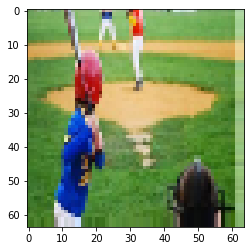

In [29]:
plt.imshow(X_test[4]) 

In [30]:
model.predict(np.expand_dims(X_test[4], axis=0))

1/1 [==============================] - 0s 142ms/step


array([[0.96352315, 0.1758459 , 0.08767797]], dtype=float32)

### Prepare data test to predict

In [31]:
test = []

for file in os.listdir('img/test/'):
    image = imread('img/test/'+file)
    smallimage = cv2.resize(image,(64,64))
    test.append(smallimage)
    

In [32]:
test = np.array(test)/255.0
test

array([[[[0.54509804, 0.64313725, 0.41960784],
         [0.55294118, 0.65098039, 0.42745098],
         [0.56078431, 0.65882353, 0.43921569],
         ...,
         [0.60784314, 0.69411765, 0.49803922],
         [0.59215686, 0.67843137, 0.49019608],
         [0.58039216, 0.66666667, 0.47843137]],

        [[0.54509804, 0.64313725, 0.41960784],
         [0.54509804, 0.64313725, 0.41960784],
         [0.5372549 , 0.63529412, 0.41176471],
         ...,
         [0.58431373, 0.65882353, 0.4745098 ],
         [0.55686275, 0.64313725, 0.45882353],
         [0.5254902 , 0.61176471, 0.43137255]],

        [[0.55294118, 0.65098039, 0.42745098],
         [0.55294118, 0.64705882, 0.42745098],
         [0.57254902, 0.67058824, 0.45098039],
         ...,
         [0.50980392, 0.59215686, 0.41960784],
         [0.49803922, 0.58431373, 0.40784314],
         [0.5254902 , 0.60784314, 0.43529412]],

        ...,

        [[0.87058824, 0.85490196, 0.72156863],
         [0.89019608, 0.8745098 , 0.7372549 ]

In [33]:
len(test)

41

In [34]:
preds = []
for i in range(len(test)):
    pred = model.predict(np.expand_dims(test[i], axis=0))
    #print(pred)
    if pred[0][0]>pred[0][1] and pred[0][0]>pred[0][2]:
        preds.append(0)
    elif pred[0][1]>pred[0][0] and pred[0][1]>pred[0][2]:
        preds.append(1)
    else:
        preds.append(2)
preds

1/1 [==============================] - 0s 27ms/step


[0,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 2]

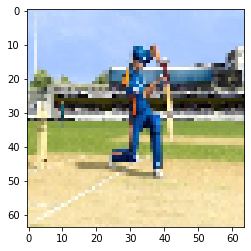

In [35]:
plt.imshow(test[4]);

In [36]:
preds[4]

1

C:\Users\botic\AppData\Local\Temp\ipykernel_12692\3168350087.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30,20))


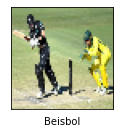

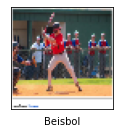

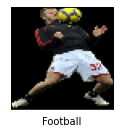

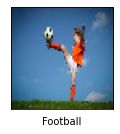

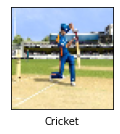

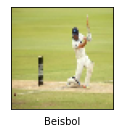

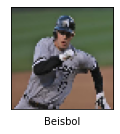

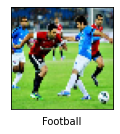

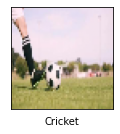

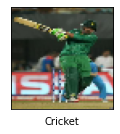

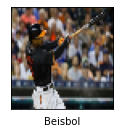

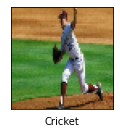

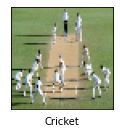

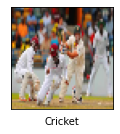

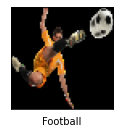

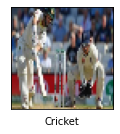

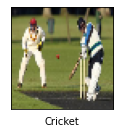

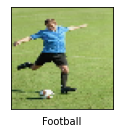

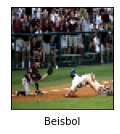

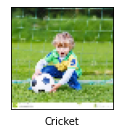

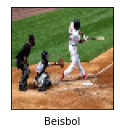

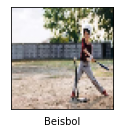

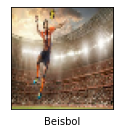

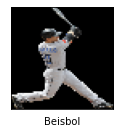

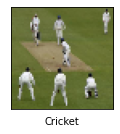

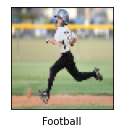

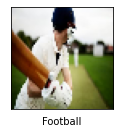

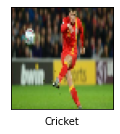

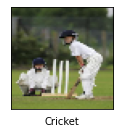

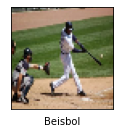

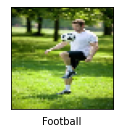

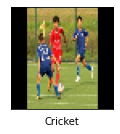

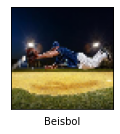

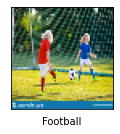

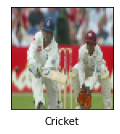

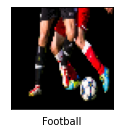

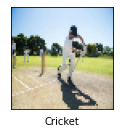

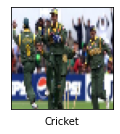

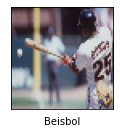

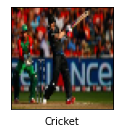

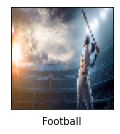

In [45]:
for i in range(len(test)):
    plt.figure(figsize=(30,20))
    plt.subplot(9,5,i+1)
    plt.xticks([])
    plt.yticks([])
    if preds[i] == 0:
        plt.xlabel('Beisbol')
        plt.imshow(test[i])
    elif preds[i] == 1:
        plt.xlabel('Cricket')
        plt.imshow(test[i])
    else:
        plt.xlabel('Football')
        plt.imshow(test[i])
plt.show()